# **Lab 4 : Nonlinear Regression**<br>

Regression is the process of estimating a model that produces the best fit for the given data. The simplest method of doing this is by Linear Regression, which assumes that the data are linear in the unknown parameters. But in real life, there are many scenarios where the data is not linearly related. Any model that is not linear in the unknown parameters is known as a **Nonlinear Regression** model. There are various forms of nonlinear regression models, one of which is the exponential model, which is given as y = ae<sup>bx<sub>i</sub></sup>, where a and b are the parameters of the regression model. The values of these two parameters should be such that the produced result of ae<sup>bx<sub>i</sub></sup> should have the least deviation from the actual result. In order to measure how well our model fits the data or whether it deviates from the actual result, we use the least square criterion.

In today's lab, we will be implementing the Exponential Regression model in python. To test our implementation, we will be using the same data that is available in the first example of our class lecture pdf. That way, you can check whether your implementation is working correctly by comparing with the results obtained in that example. Run the following cell to load the known data points:


In [52]:
time = [0, 1, 3, 5, 7, 9]
gamma = [1, 0.891, 0.708, 0.562, 0.447, 0.355]

##Task 1
Assuming that the exponential model for the given data is defined as γ = Ae<sup>λt</sup>, write a function that takes the given data as input and returns the regression parameters A and λ. 

In [73]:
from math import e
import numpy as np
def nonLinFunc(l):
  x  = np.array(time)
  y = np.array(gamma)
  e = np.exp(l*x)
  e2 = np.exp(2*l*x)

  se2 = np.sum(np.exp(2*l*x))
  sxe2 = np.matmul(e2, x)
  sye = np.matmul(e,y)
  sxye = np.matmul(e,x*y)

  out = sxye - (sye/se2)*sxe2
  return out

In [80]:
from scipy.optimize import fsolve
def NonLinearRegression(time, gamma):

  #Write your implementation here
  x  = np.array(time)
  y = np.array(gamma)
  l = fsolve(nonLinFunc,0)[0]
  A = np.sum(y * np.exp(l * x)) / np.sum(np.exp(2 * l * x))

  return A, l  

In [81]:
NonLinearRegression(time, gamma)

(0.9998414038717602, -0.11508304094523766)

##Task 2
Write another function that takes any arbitrary value as input and applies the regression model to generate the output. 

In [91]:
def calculate(t):
  #Write your implementation here
  A,l = NonLinearRegression(time, gamma)
  return A*pow(e,l*t)

##Task 3
Use the calculate function in a loop to generate a plot of the regression curve. Show the original data points (time, gamma) on the same plot using stem function. Use different colors for the regression curve and the original data points and show a legend. For this task, you are allowed to use various libraries such as matplotlib.

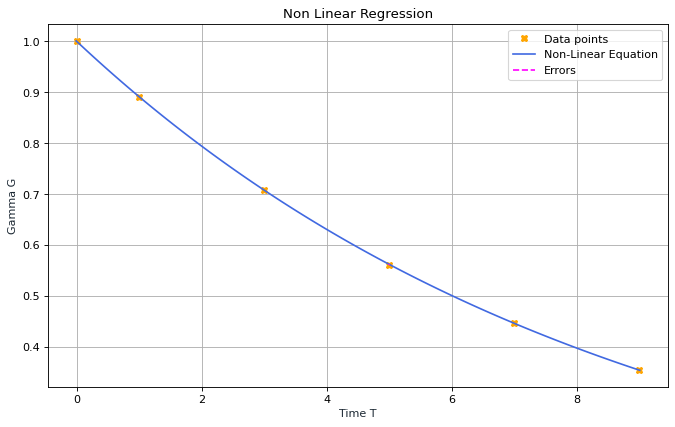

In [90]:
import matplotlib.pyplot as plt
#Write your code here for generating the plot

x_line = np.linspace(np.min(time) - 0.01, np.max(time) + 0.01, 100)
y_line = calculate(x_line)

plt.figure(figsize=(10, 6), dpi=80)
plt.title('Non Linear Regression')
plt.xlabel('Time T', color='#1C2833')
plt.ylabel('Gamma G', color='#1C2833')
plt.plot(time, gamma, 'X', color = 'orange', label = 'Data points')
plt.plot(x_line, y_line, '-',  label = 'Non-Linear Equation', color = 'royalblue')
# plt.stem(theta, torque, use_line_collection = True)
for i in range(len(time)):
    if i==0:
        plt.plot((time[i], time[i]), (gamma[i], calculate(time[i])), '--', color = 'magenta', label = 'Errors')
    else:
        plt.plot((time[i], time[i]), (gamma[i], calculate(time[i])), '--', color = 'magenta')
plt.legend(loc='best')
plt.grid()
plt.show()